In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

In [137]:
data = pd.read_excel("./Pistachio_28_Features_Dataset.xlsx")
data.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio


### 데이터 분석

In [138]:
#.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [139]:
#.describe()
data.describe()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,...,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,...,191.995311,21.380084,22.591454,22.427056,-0.735243,-0.615580,-0.367142,3.054000,2.903015,2.940572
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,...,13.030505,3.127813,3.622222,3.926325,0.384584,0.389219,0.426964,0.733993,0.651383,0.750171
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,...,146.787600,10.611100,11.985400,11.197100,-1.931600,-1.658200,-2.348600,1.662400,1.665500,1.522500
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,...,182.930675,19.253550,20.036675,19.722425,-0.990900,-0.875975,-0.645800,2.509700,2.437400,2.449425
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,...,192.036350,21.425100,22.523250,22.276900,-0.756600,-0.653050,-0.424550,2.941750,2.807050,2.783350
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,...,201.097725,23.695900,25.241900,25.140125,-0.502500,-0.405000,-0.158400,3.446500,3.247400,3.224650
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,...,235.000700,30.838300,33.614600,42.756600,1.865400,2.257600,1.852100,8.890600,10.453900,11.533900


In [140]:
data["Class"].unique()

array(['Kirmizi_Pistachio', 'Siirt_Pistachio'], dtype=object)

### 데이터 전처리

In [141]:
df = data[['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness',"Class"]] 

In [142]:
df

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,Siirt_Pistachio


In [143]:
#명목변수를 숫자로 치환
def encoder(series):
    dic = dict(zip(series.unique(), range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result

In [144]:
df["Class"] = encoder(df["Class"])
df

C:\Users\user\AppData\Local\Temp\ipykernel_14636\388064197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = encoder(df["Class"])


,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,1
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,1
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,1
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,1


### EDA

In [145]:
df.corrwith(df["Class"]).sort_values(ascending= False)

Class           1.000000
Minor_Axis      0.668126
Compactness     0.624939
Area            0.589226
Convex_Area     0.584618
Eqdiasq         0.577300
Perimeter       0.145290
Major_Axis      0.136845
Solidity        0.125347
Roundness       0.105768
Extent          0.100200
Eccentricity   -0.546759
Aspect_Ratio   -0.581469
dtype: float64

In [146]:
df.corr()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
Area,1.000000,0.115941,0.697782,0.795881,-0.358892,0.997399,0.363959,0.943877,0.331784,-0.424025,0.250423,0.551711,0.589226
Perimeter,0.115941,1.000000,0.094296,0.390740,-0.334483,0.113631,-0.671046,0.364474,-0.403916,-0.312373,-0.891777,0.044624,0.145290
Major_Axis,0.697782,0.094296,1.000000,0.272578,0.298836,0.705333,0.247822,0.661892,0.186830,0.265049,0.153592,-0.201121,0.136845
Minor_Axis,0.795881,0.390740,0.272578,1.000000,-0.816731,0.793155,-0.085556,0.890003,0.047442,-0.839078,-0.066594,0.773512,0.668126
Eccentricity,-0.358892,-0.334483,0.298836,-0.816731,1.000000,-0.352723,0.257060,-0.482713,0.080967,0.943751,0.171669,-0.846851,-0.546759
Eqdiasq,0.997399,0.113631,0.705333,0.793155,-0.352723,1.000000,0.372779,0.940651,0.340073,-0.423318,0.254242,0.549971,0.577300
Solidity,0.363959,-0.671046,0.247822,-0.085556,0.257060,0.372779,1.000000,0.042000,0.678599,0.177830,0.779134,0.226165,0.125347
Convex_Area,0.943877,0.364474,0.661892,0.890003,-0.482713,0.940651,0.042000,1.000000,0.122881,-0.522637,-0.007125,0.515907,0.584618
Extent,0.331784,-0.403916,0.186830,0.047442,0.080967,0.340073,0.678599,0.122881,1.000000,0.023303,0.512278,0.254064,0.100200
Aspect_Ratio,-0.424025,-0.312373,0.265049,-0.839078,0.943751,-0.423318,0.177830,-0.522637,0.023303,1.000000,0.115896,-0.896857,-0.581469


<AxesSubplot:>

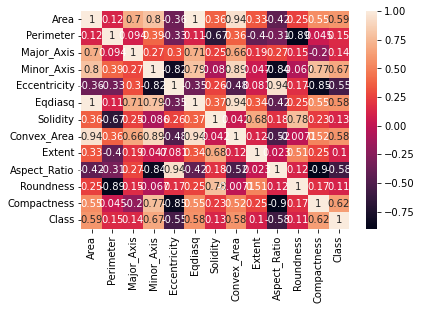

In [147]:
sns.heatmap(df.corr(),annot=True)

In [148]:
df = df[['Minor_Axis','Solidity', 'Extent','Roundness', 'Compactness',"Class"]] 

In [149]:
df

,Minor_Axis,Solidity,Extent,Roundness,Compactness,Class
0,236.7461,0.8665,0.6394,0.3238,0.7278,0
1,234.7525,0.8765,0.6772,0.2277,0.7181,0
2,220.5547,0.9172,0.7127,0.5951,0.6767,0
3,216.0765,0.9589,0.7028,0.4278,0.7005,0
4,220.9344,0.9657,0.7459,0.6425,0.6803,0
...,...,...,...,...,...,...
2143,248.8627,0.9823,0.6799,0.8070,0.7446,1
2144,278.9297,0.8886,0.6590,0.1988,0.7509,1
2145,271.3299,0.9888,0.7584,0.8061,0.7551,1
2146,274.5764,0.9902,0.7635,0.8569,0.7788,1


<AxesSubplot:>

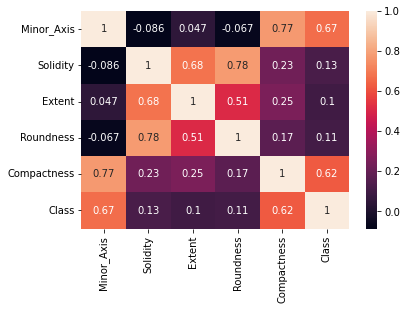

In [150]:
sns.heatmap(df.corr(),annot=True)

### train,test split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(df[['Minor_Axis','Solidity', 'Extent','Roundness', 'Compactness']], df["Class"], random_state = 0)

### 모델 선언

In [152]:
modelR = RandomForestClassifier()
modelGD = GradientBoostingClassifier()
modelK = KNeighborsClassifier(n_neighbors=5)
modelXG= xgb.XGBClassifier()
modelLG = LGBMClassifier()
modelLR = LogisticRegression()
modelT = DecisionTreeClassifier()

### 모델학습

In [153]:
modelR.fit(X_train, y_train)
modelGD.fit(X_train, y_train)
modelK.fit(X_train, y_train)
modelXG.fit(X_train, y_train)
modelLG.fit(X_train, y_train)
modelLR.fit(X_train, y_train)
modelT.fit(X_train, y_train)

DecisionTreeClassifier()

### 모델 평가

In [154]:
print("KNN 모델 성능: " , modelK.score(X_test,y_test))
print("GD 모델 성능: " , modelGD.score(X_test,y_test))
print("Rtree 모델 성능: " , modelR.score(X_test,y_test))
print("XG 모델 성능: " , modelXG.score(X_test,y_test))
print("LGBM 모델 성능: " , modelLG.score(X_test,y_test))
print("LR 모델 성능: " , modelLR.score(X_test,y_test))
print("Tree 모델 성능: " , modelT.score(X_test,y_test))

KNN 모델 성능:  0.8417132216014898
GD 모델 성능:  0.8808193668528864
Rtree 모델 성능:  0.8808193668528864
XG 모델 성능:  0.8696461824953445
LGBM 모델 성능:  0.8677839851024208
LR 모델 성능:  0.8864059590316573
Tree 모델 성능:  0.8175046554934823


In [155]:
pred1 = modelK.predict(X_train)
pred2 = modelGD.predict(X_train)
pred3 = modelR.predict(X_train)
pred4 = modelXG.predict(X_train)
pred5 = modelLG.predict(X_train)
pred6 = modelLR.predict(X_train)
pred7 = modelT.predict(X_train)


In [156]:
pred_avg = np.round((pred1+pred2+pred3+pred4+pred5+pred6+pred7)/7)

In [157]:
score = 0
for a, i in enumerate(pred_avg):
    if y_train.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_train)

0.9987585350713842

### 시각화

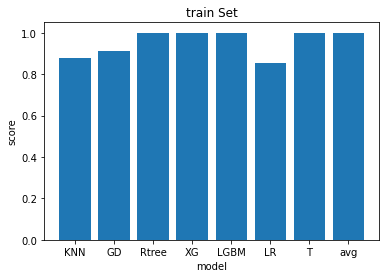

In [158]:
models = ["KNN","GD","Rtree","XG","LGBM","LR","T","avg"]
scr = [modelK.score(X_train,y_train),modelGD.score(X_train,y_train), modelR.score(X_train,y_train), 
       modelXG.score(X_train,y_train), modelLG.score(X_train,y_train), modelLR.score(X_train,y_train)
       ,modelT.score(X_train,y_train), score/len(y_train)]
plt.bar(models,scr)
plt.title("train Set")
plt.xlabel("model")
plt.ylabel("score")
plt.show()

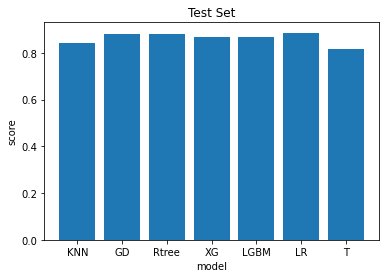

In [159]:
models = ["KNN","GD","Rtree","XG","LGBM","LR","T"]
scr = [modelK.score(X_test,y_test),modelGD.score(X_test,y_test), modelR.score(X_test,y_test), 
       modelXG.score(X_test,y_test), modelLG.score(X_test,y_test), modelLR.score(X_test,y_test)
       ,modelT.score(X_test,y_test)]
plt.bar(models,scr)
plt.title("Test Set")
plt.xlabel("model")
plt.ylabel("score")
plt.show()